In [134]:
import matplotlib.pyplot as plt
import argparse
from imutils import paths
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [135]:
Dataset=r'F:\Computer Science\datasets\Data'

In [176]:
INIT_LR = 1e-5
EPOCHS = 60
BS = 1


In [137]:
args={}
args["dataset"] =Dataset


In [138]:


import numpy as np
import cv2
import os

iPaths = list(paths.list_images(args["dataset"]))
data=[]
labels=[]
for iPath in iPaths:
    label=iPath.split(os.path.sep)[-2]
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(244,244))
    data.append(image)
    labels.append(label)
data=np.array(data)/255.0
labels = np.array(labels)

In [139]:
data[0]

array([[[0.52156863, 0.52156863, 0.52156863],
        [0.48235294, 0.48235294, 0.48235294],
        [0.45490196, 0.45490196, 0.45490196],
        ...,
        [0.53333333, 0.53333333, 0.53333333],
        [0.52941176, 0.52941176, 0.52941176],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.43137255, 0.43137255, 0.43137255],
        [0.39215686, 0.39215686, 0.39215686],
        [0.35686275, 0.35686275, 0.35686275],
        ...,
        [0.49411765, 0.49411765, 0.49411765],
        [0.49019608, 0.49019608, 0.49019608],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.25882353, 0.25882353, 0.25882353],
        [0.20784314, 0.20784314, 0.20784314],
        [0.21960784, 0.21960784, 0.21960784],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.45882353, 0.45882353, 0.45882353],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.96862745, 0.96862745, 0.96862745],
        [0.95686275, 0.95686275, 0.95686275],
        [0.94901961, 0

In [140]:
labels


array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [141]:
Dataset1=r'F:\Computer Science\datasets\Data//'
Cimages = os.listdir(Dataset1+"Covid")
Nimages = os.listdir(Dataset1+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


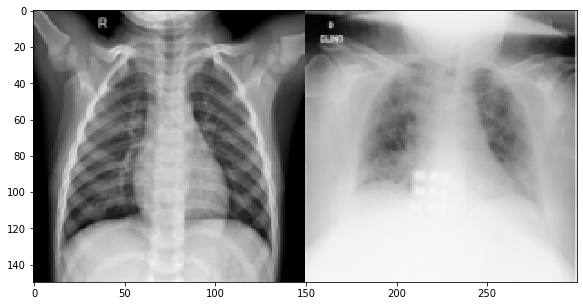

Normal Chest X-ray Vs Covid-19 Chest X-ray


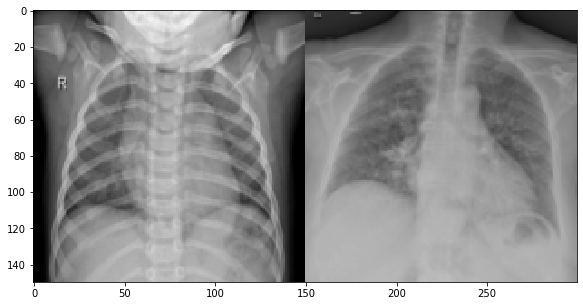

Normal Chest X-ray Vs Covid-19 Chest X-ray


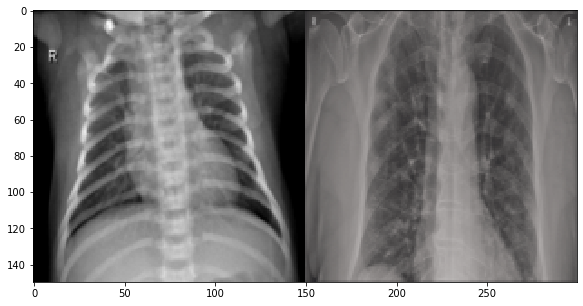

Normal Chest X-ray Vs Covid-19 Chest X-ray


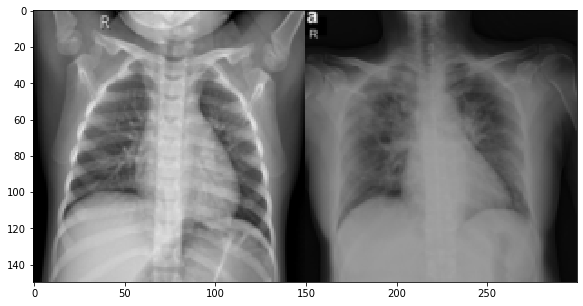

Normal Chest X-ray Vs Covid-19 Chest X-ray


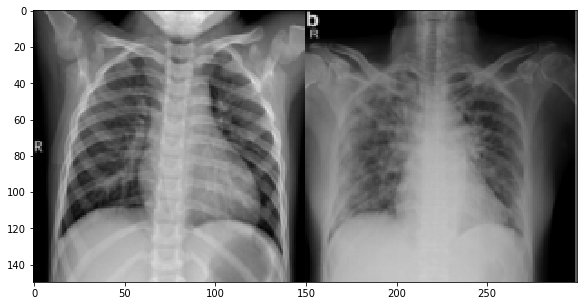

In [142]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Dataset1+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Dataset1+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [143]:
LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [144]:
(X_train,X_test, Y_train,Y_test) =train_test_split(data,labels,test_size=0.2,random_state=42,stratify=labels)
trainAug= ImageDataGenerator(rotation_range=15,fill_mode="nearest")


In [145]:
bModel = VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(244,244,3)))
hModel=bModel.output
hModel = AveragePooling2D(pool_size=(4,4))(hModel)
hModel=Flatten(name='Flatten')(hModel)
hModel=Dense(64,activation='relu')(hModel)
hModel=Dropout(0.5)(hModel)
hModel=Dense(2,activation='softmax')(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False


In [146]:

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((160, 244, 244, 3), (40, 244, 244, 3), (160, 2), (40, 2))

In [177]:
op = Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy',optimizer=op,metrics=['accuracy'])
print("Compiling Starts")

Compiling Starts


In [178]:
R = model.fit_generator(trainAug.flow(X_train,Y_train,batch_size=BS),steps_per_epoch=160,validation_data=(X_test,Y_test),validation_steps=40,epochs=EPOCHS)

Epoch 1/60
160/160 [==============================] - 32s 200ms/step - loss: 0.5114 - accuracy: 0.7375 - val_loss: 0.4739 - val_accuracy: 0.9000
Epoch 2/60
160/160 [==============================] - 34s 213ms/step - loss: 0.4705 - accuracy: 0.8250 - val_loss: 0.4698 - val_accuracy: 0.8750
Epoch 3/60
160/160 [==============================] - 34s 214ms/step - loss: 0.4783 - accuracy: 0.8000 - val_loss: 0.4654 - val_accuracy: 0.9000
Epoch 4/60
160/160 [==============================] - 35s 216ms/step - loss: 0.4883 - accuracy: 0.8375 - val_loss: 0.4608 - val_accuracy: 0.9000
Epoch 5/60
160/160 [==============================] - 34s 215ms/step - loss: 0.4835 - accuracy: 0.8062 - val_loss: 0.4564 - val_accuracy: 0.9000
Epoch 6/60
160/160 [==============================] - 35s 216ms/step - loss: 0.4901 - accuracy: 0.8313 - val_loss: 0.4513 - val_accuracy: 0.9000
Epoch 7/60
160/160 [==============================] - 35s 216ms/step - loss: 0.4617 - accuracy: 0.8438 - val_loss: 0.4476 - val_ac

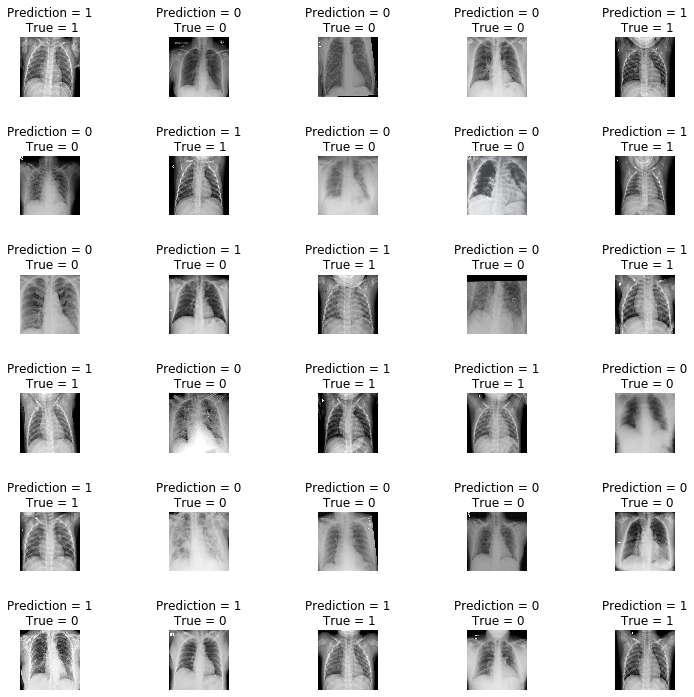

In [179]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [180]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      0.85      0.92        20
      Normal       0.87      1.00      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.925

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[17  3]
 [ 0 20]]
acc: 0.9250
sensitivity: 0.8500
specificity: 1.0000


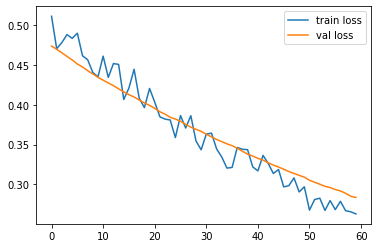

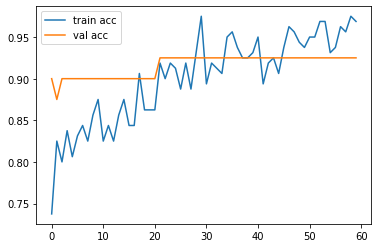

In [183]:

# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [184]:
model.save('Covid_model.h5')

Prediction: Corona


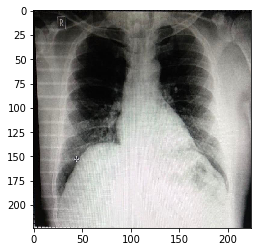

In [185]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('test.jpeg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')